In [7]:
import pandas as pd
df = pd.read_csv("AMD 20 YEAR PRICE DATA_1.csv", index_col='Date', parse_dates=["Date"])

print(df.head())
print(df.tail())

             Open   High    Low   Last  Close  Total Trade Quantity   Turnover
Date                                                                          
2004-01-04  15.10  15.11  14.77  14.86  14.90               8225700  122954900
2004-01-05  15.05  15.27  15.01  15.20  14.86               9157300  139011700
2004-01-06  15.21  15.82  15.05  15.61  15.20              14592400  226088900
2004-01-07  15.78  15.99  15.49  15.66  15.61              15331000  240806400
2004-01-08  15.95  16.00  15.59  15.93  15.66              12062900  190947700
               Open      High       Low    Last   Close  Total Trade Quantity  \
Date                                                                            
2024-04-05  168.100  172.6900  165.5800  170.42  165.83              66080261   
2024-04-08  168.200  171.6599  166.8200  169.90  170.42              43997546   
2024-04-09  170.210  171.6000  167.2900  170.78  169.90              42927985   
2024-04-10  166.710  169.7752  164.0000  1

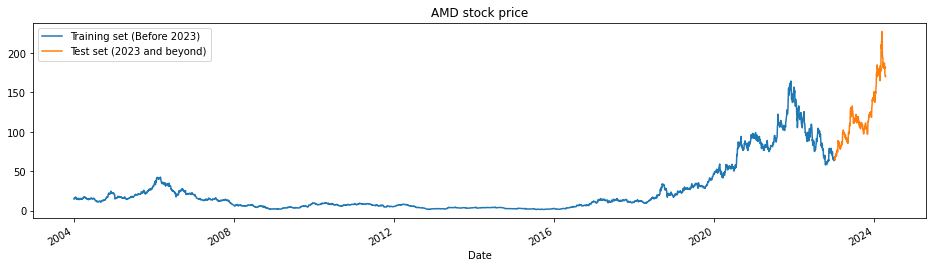

In [8]:
import matplotlib.pyplot as plt
# Plot the training set
df["High"][:'2022'].plot(figsize=(16, 4), legend=True)
# Plot the test set
df["High"]['2023':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2023)', 'Test set (2023 and beyond)'])
plt.title('AMD stock price')
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler

# here we are seperating the data 
training_set = df[:'2022'].iloc[:,1:2].values
test_set = df['2023':].iloc[:,1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
import numpy as np

X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=30))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1))


regressor.compile(optimizer='adam',loss='mean_squared_error')

In [21]:
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
148/148 [==============================] - 10s 42ms/step - loss: 0.0049
Epoch 2/50
148/148 [==============================] - 6s 42ms/step - loss: 0.0018
Epoch 3/50
148/148 [==============================] - 6s 42ms/step - loss: 0.0018
Epoch 4/50
148/148 [==============================] - 6s 42ms/step - loss: 0.0015
Epoch 5/50
148/148 [==============================] - 6s 42ms/step - loss: 0.0015
Epoch 6/50
148/148 [==============================] - 6s 42ms/step - loss: 0.0015
Epoch 7/50
148/148 [==============================] - 6s 42ms/step - loss: 0.0014
Epoch 8/50
148/148 [==============================] - 6s 43ms/step - loss: 0.0012
Epoch 9/50
148/148 [==============================] - 6s 43ms/step - loss: 0.0011
Epoch 10/50
148/148 [==============================] - 6s 44ms/step - loss: 0.0012
Epoch 11/50
148/148 [==============================] - 6s 43ms/step - loss: 9.3101e-04
Epoch 12/50
148/148 [==============================] - 6s 44ms/step - loss: 0.0011
Epoch 13

In [22]:
# pre-processing the data 
dataset_total = pd.concat((df["High"][:'2022'],df["High"]['2023':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# making the test data
X_test = []
for i in range(60,len(inputs)):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

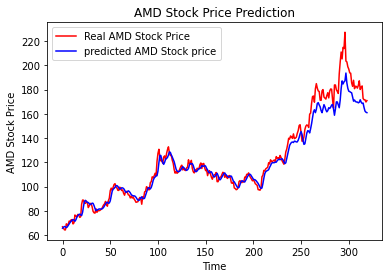

In [23]:
def plot_prediction(test,prediction):
    plt.plot(test,color='red',label="Real AMD Stock Price")
    plt.plot(prediction, color="blue",label="predicted AMD Stock price")
    plt.title("AMD Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("AMD Stock Price")
    plt.legend()
    plt.show()
# now we'll use this function to visualize our test and predicted data

plot_prediction(test_set,predicted_stock_price)

In [44]:

import math
from sklearn.metrics import mean_squared_error

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
  
return_rmse(test_set, predicted_stock_price)

The root mean squared error is 7.827530218864373.
